<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/Dimension_Reduction1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 06 차원 축소

#### 01) 차원축소의 개요

차원 축소: 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것.

 - 차원이 증가하면

* 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고
* 희소한 구조를 가지게 된다. 또한 예측 신뢰도가 떨어진다
* 개별 피처간 상관관계가 높을 가능성이 크다. 

1. 피처 선택

특성 선택은 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터특징을 잘 나타내는 주요 피처만 선택

2. 피처 추출

기존 피처를 저차원의 중요 피처로 압축해서 추출
-> 기존의 피처와는 완전히 다른 값 ( 잠재적인 요소를 추출)

* PCA, SVD, NMF : 대표적인 차원 축소 알고리즘
* 차원 축소 알고리즘은 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있다. 
* 과적합 영향력이 작아져서 원본 데이터로 예측하는 것보다 예측 성능이 높아짐
* 문서 내 단어들의 구성에서 숨겨져있는 시맨틱이나 토픽을 잠재 요소로 간주하고 이를 찾아낼 수 있다. 

#### 02) PCA ( principal component analysis)

**PCA 개요** 

* 가장 내표적인 차원 축소 기법
* 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
* 기존 데이터의 정보 유실이 최소화되는 것이 당연
* 가장 높은 분산을 가지는 데이터의축을 찾아 이 축으로 차원을 축소한다. 이것이 PCA의 주성분이 된다.

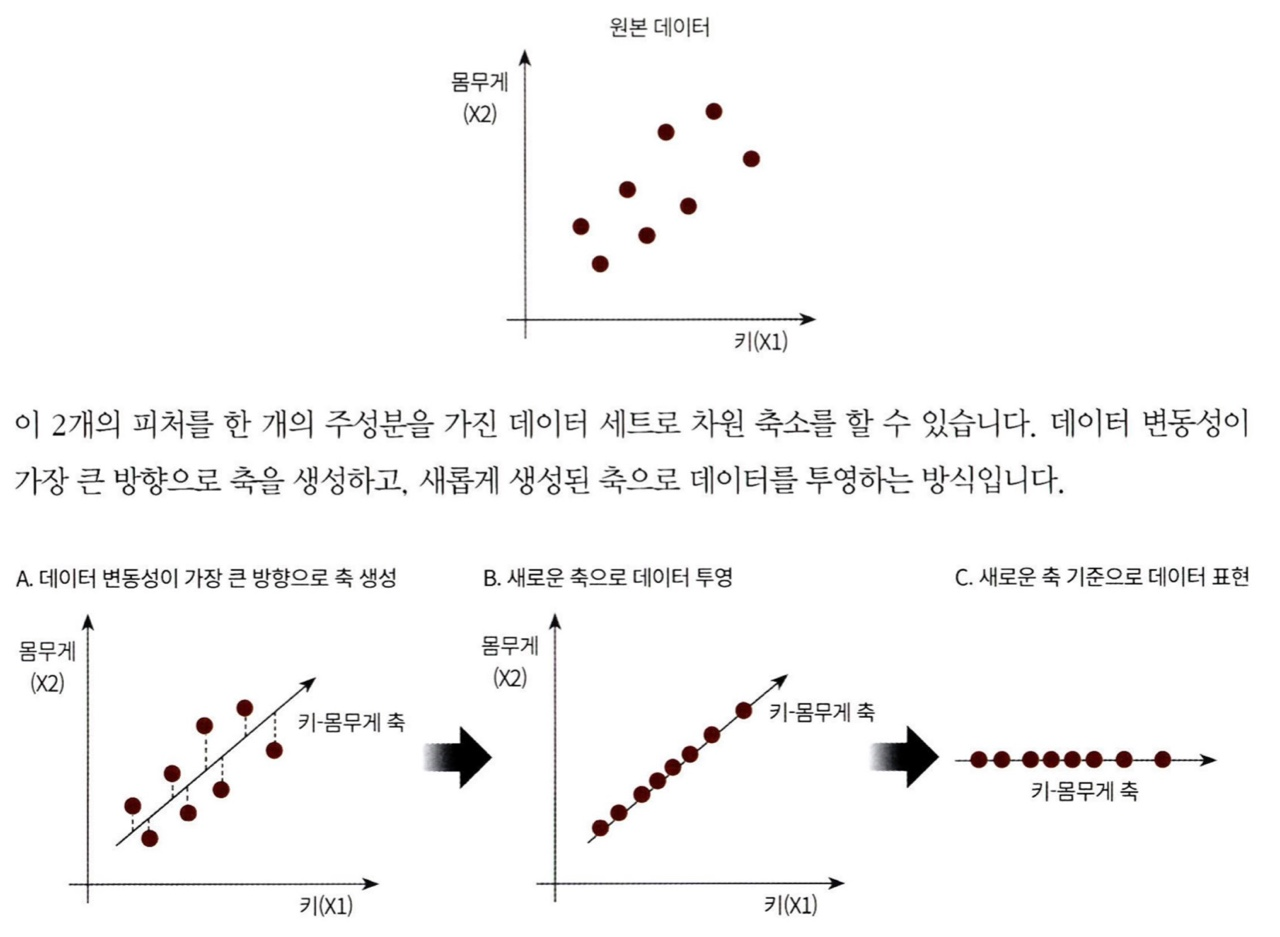
<차원 축소 과정>

PCA는 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성하고

두번재 축은 이 벡터 축에 직각이 되는 벡터를 축으로 한다. 

세번째 축은 다시 두번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성한다. 

<PCA를 선형대수 관점에서 해석>

입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다. 

이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다. 

고유값 : 이 고유 벡터의 크기를 나타내며 동시에 입력 데이터의 분산을 나타냄


> 선형 변환 : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미
특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념이며 이 행렬을 바로 공간으로 가정함

> 공분산 행렬 : 여러 변수와 관련된 공분산을 포함하는 정방형 행렬

C = P 시그마 t(P)

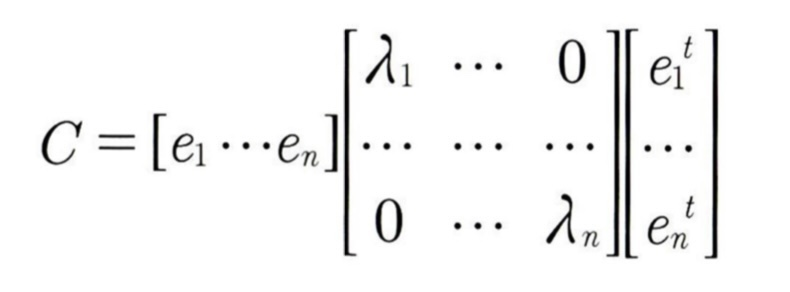

**입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것이다.**

<PCA 스탭>

1. 입력 데이터 세트읙 공분산 행렬을 생성한다. 
2. 공분산 행렬의 고유벡터와 고유값을 계산한다.
3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼) 만큼 고유벡터를 추출한다.
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.




In [12]:
#붓꽃 데이터 세트를 이용하여 4개의 속성을 2개의 PCA차원으로 압축해 변화보기

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화해보자. 

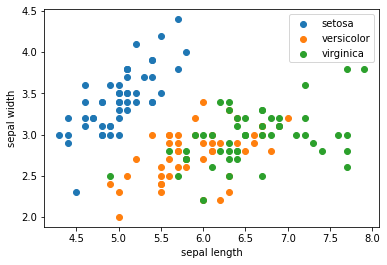

In [16]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2, 각 타깃 별로 다른 모양으로 산점도로 표시
for i, maker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

-> setosa 품종의 경우 sepal width 가 3.0보다 크고 sepal length가 6.0이하인 곳에 일정하게 분포돼있다.

-> versicolor 와 virginica의 경우 sepal width와 sepal length조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있다. 

--------------
#### pca로 4개 속성을 2개로 압축한 뒤 2개의 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화

먼저 스케일링 작업 필요

In [17]:
from sklearn.preprocessing import StandardScaler

#target 값을 제외한 모든 속성 값을 standardscaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:, :-1])

pca를 적용해 4차원의 붓꽃 데이터를 2차원 pca데이터로 변환해보자.
사이킷런은 pca변환을 위해 PCA클래스를 제공한다.

PCA 클래스 생성 파라미터 : n_components를 입력받는다. (변환할 차원의 수 )

In [18]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

#fit과 transform 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [19]:
#PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명.
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


이제 2개의 속성으로 PCA변환된 데이터 세트를 시각화해보자.

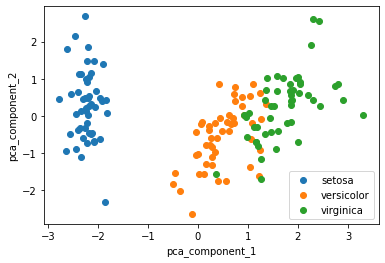

In [21]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, maker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

-> PCA변환한 후에도 pca_component_1축을 기반으로 setosa품종은 명확하게 구분이 가능하다. versicolor와 virginica는 pca_component_1축을 기반으로 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분되었다. 이는 PCA의 첫번재 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문이다.

In [22]:
#PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보자.
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


-> 첫번째 pca변환 요소인 pca_component_1이 전체 변동성의 약 72%를 차지, 두 번째인 pca_component_2가 22%를 차지. 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성 95%을 설명할 수 있다.

------------
#### 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한후 결과비교

먼저 원본 붓꽃 데이터에 랜덤 포레스트 적용

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


이제 4차원 데이터를 2차원으로 변환한 데이터 세트에 적용

In [24]:
pca_X=irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


-> 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 덜어질 수 밖에 없다. 

하지만 속성 개수가 50%감소한 것을 고려한다면 PCA변환 후에도 원본 데이터의 특성을 상당부분 유지하고 있음을 알 수 있다.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/ESAA_YB/credit_card.xlsx', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


-> 신용카드 데이터 세트는 3만개의 레코드와 24개의 속성을 가지고 있다. 

<데이터 처리>

'default payment next month'속성이 target값으로 다음달 연체여부를 의미하며 연체일 경우1, 정상납부가 0이다. 

원본 데이터 세트에 PAY_0 다음에 _2이므로 _0을_1로 칼럼명을 변환하자. 

'default payment next month'칼럼명도 'default'로 변경

Target속성인 'default' 칼럼을 y_target변수로 별도로 저장하고 피처 데이터는 default칼럼을 제외한 별도의 DF로 만든다.

In [42]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target=df['default']
X_features=df.drop('default', axis=1)

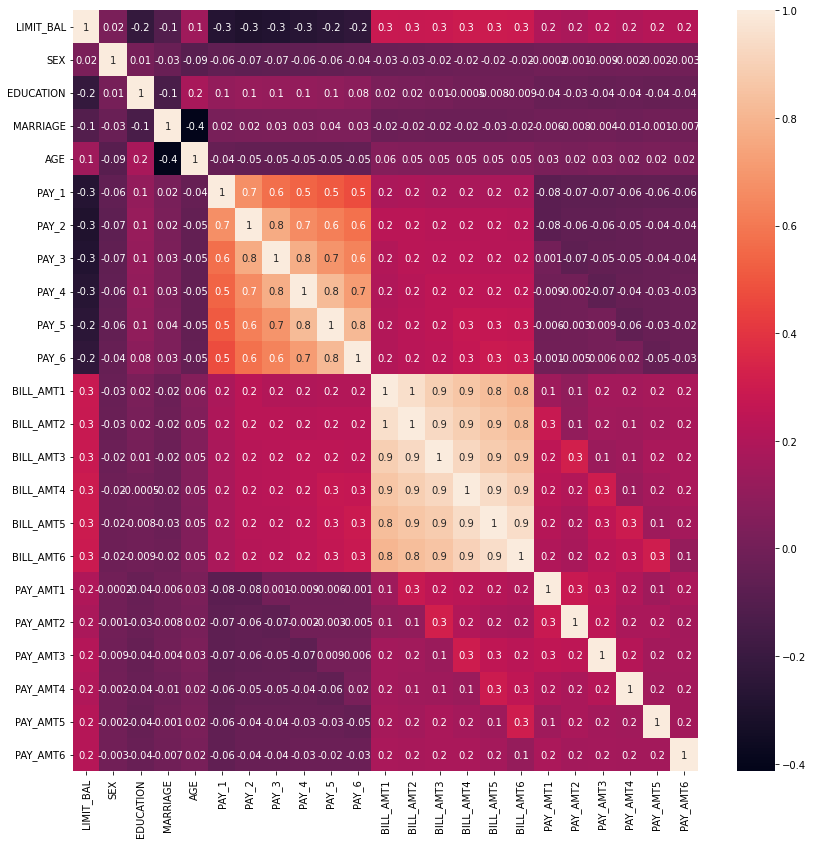

In [43]:
#각 속성 간의 상관도를 구하고 이를 시본의 heatmap으로 시각화

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

-> BILL_AMT1~ BILL_AMT6 6개 속성끼리 상관도가 대부분 0.9이사응로 매우 높음. 

In [44]:
#6개 속성을 2개의 컴포넌트로 PCA변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보자.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Bill_amt1부터 6까지 6개의 속성명 생성
cols_bill=['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

#2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit_transform(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


-> 단 2개의 PCA컴포넌트 만으로도 6개 속성의 변동성을 약 95% 설명할 수 있으며 특히 첫번재 PCA축으로 90% 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다. 

In [45]:
#원본 데이터 세트에 랜덤 포레스트 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300, random_state=156)
scores=cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


-> 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.71%를 나타냈다.

이제 6개의 컴포넌트로 PCA변환한 데이터 세트에 대해서 동일하게 분류 예측 적용

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#원본 데이터 세트에 먼저 standardscaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(X_features)

#6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_scre()로 분류 예측 수행.
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 fold 세트별 정확도: [0.7907 0.798  0.8033]
PCA 변환 데이터 세트 평균 정확도:0.797333


-> 전체 23개 속성의 약 1/4 수준인 6개의 PCA컴포넌트만으로도 원본 데이터를 기반으로 한 분류예측 결과보다 1~2%의 예측 성능 저하만 발생.  이는 뛰어난 압축 능력을 잘 보여주는 것.

PCA는 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용할 수 있지만 이보다 더 활발하게 적용되는 영역은 컴퓨터 비전 분야이다. 

--------------
### 03 LDA(linear discriminant analysis)

**LDA 개요**

* 선형 판별 분석법, PCA와 매우 유사
* PCA와 비슷하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다. 
* PCA는 입력 데이터의 변동성의 가장 큰 축을 찾지만 LDA는 입력 데이터의 결정값클래스를 최대한으로 분리할 수 있는 축을 찾는다.
* 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기위해 클래스간 분산과 클래스 내부 분산의 비율을 최대화 하는 방식으로 차원을 축소 

<LDA 구하는 스탭>

1. 클래스 내부와 클래스 간 분산 행렬을 구한다. 이 두개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터를 기반으로 구한다.

2. 두 행렬을 고유 백터로 분해할 수 있다.
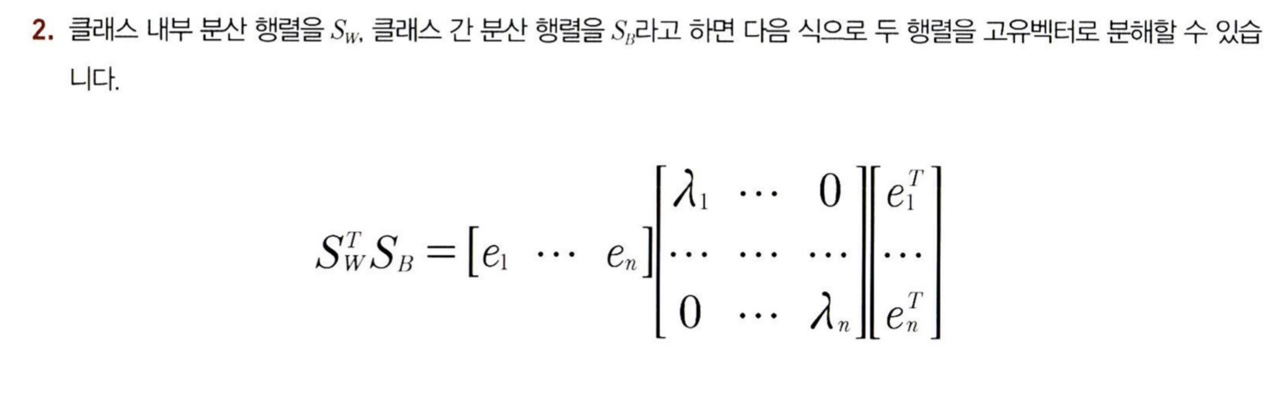
3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출한다.

4. 고유값이 가장 큰 순으로 추출된 고유 벡터를 이용해 새롭게 입력 데이터를 변환

---------
**붓꽃 데이터 세트에 lda적용하기 **

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 지도학습이다.

즉 클래스의 결정값이 변환시에 필요하다. 

In [48]:

lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)
     

(150, 2)


이제 LDA벼노한된 입력 데이터 값을 2차원 평면에 품종별로 표현해본다.

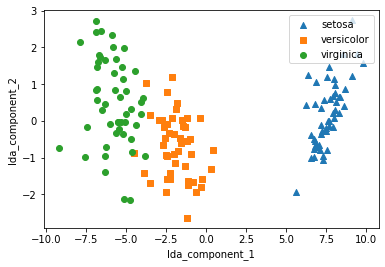

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1', 'lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa 세모, versicolor 네모, virginica 동그라미
markers=['^', 's', 'o']

#setosa 타깃 값은 0, versicolor는 1, virginica는 2, 각 타깃 별로 다른 모양으로 산점도 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()